In [1]:
import collections
import inspect

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/ross/code/python/projects/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

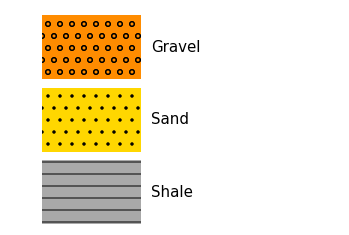

In [3]:
graphiclog.defaults.litholegend.plot()

In [4]:
beds = pd.read_csv('../data/Export_StripLog2020-04-01.csv')
beds

,BedNumber,name,collection,tops,th,gs_tops,sand_shl,mean_gs,max_gs,grain_size_dia,grain_size_thick
0,1,TestName,TestLoc,1,1.01,12.210394,1,0.323684,12.210394,"0.00181474719529853,0.0331299265668441,0.09281...","0.02,0.2,0.4,0.6,0.8,0.99"
1,2,TestName,TestLoc,2,1.00,34.016823,1,34.135964,35.151499,"35.1514987409342,34.0168225429087,34.016822542...","1.02,1.2,1.4,1.6,1.8,1.98"
2,4,TestName,TestLoc,4,1.00,0.746226,1,0.550163,0.761490,"0.34830002054924,0.761490497453304,0.348300020...","3.02,3.2,3.4,3.6,3.8,3.99"
3,5,TestName,TestLoc,5,1.00,0.001531,1,0.207285,0.746226,"0.746226063574762,0.34830002054924,0.186802122...","4.02,4.2,4.4,4.6,4.8,4.98"
4,6,TestName,TestLoc,6,1.00,0.187574,1,0.187045,0.187574,"0.186802122027444,0.187574013849053,0.18757401...","5.02,5.2,5.4,5.6,5.8,5.98"
5,7,TestName,TestLoc,7,1.00,33.386683,1,5.036898,33.386683,"0.187574013849053,0.342917364390365,0.75480766...","6.01,6.2,6.4,6.6,6.8,6.98"


In [5]:
# use string->array transforms
transforms = {c : graphiclog.utils.string2array_matlab for c in ['grain_size_dia', 'grain_size_thick']}

beds = pd.read_csv('../data/Export_StripLog2020-04-01.csv', converters=transforms)

# add_psi column for plots
beds['grain_size_psi'] = beds['grain_size_dia'].apply(graphiclog.wentworth.gs2psi)

In [6]:

datacols = ['th', 'gs_tops', 'sand_shl', 'mean_gs', 'max_gs', 
            'grain_size_dia', 'grain_size_psi', 'grain_size_thick']

metacols = ['name', 'collection']

# default litho mapping uses `units='psi'`
COMPONENT_MAP = ('mean_gs', lambda gs: graphiclog.defaults.gs2litho(gs, units='mm'))

# NOTE: had to increase tolerance, ambiguous whether tops are depth or elevation?
bed_seq = graphiclog.BedSequence.from_dataframe(beds, topcol='tops', thickcol='th',
                                                component_map=COMPONENT_MAP,
                                                datacols=datacols, 
                                                metacols=metacols, 
                                                tol=0.5)

bed_seq.metadata

{'name': 'TestName', 'collection': 'TestLoc'}

In [7]:
bed_seq.start, bed_seq.stop

(Position({'middle': -0.010000000000000009, 'units': 'm'}),
 Position({'middle': 7.0, 'units': 'm'}))

In [8]:
bed_seq[0]

Interval({'data': {'th': 1.0, 'gs_tops': 33.3866832279516, 'sand_shl': 1, 'mean_gs': 5.03689789545743, 'max_gs': 33.3866832279516, 'grain_size_dia': array([ 0.18757401,  0.34291736,  0.75480766,  1.49242997,  3.48608163,
       33.38668323]), 'grain_size_psi': array([-2.41446812, -1.54406713, -0.40581903,  0.57766324,  1.80160635,
        5.06120087]), 'grain_size_thick': array([6.01, 6.2 , 6.4 , 6.6 , 6.8 , 6.98])}, 'top': Position({'middle': 7.0, 'units': 'm'}), 'base': Position({'middle': 6.0, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'gravel'})]})

In [9]:
bed_seq[0].order

'elevation'

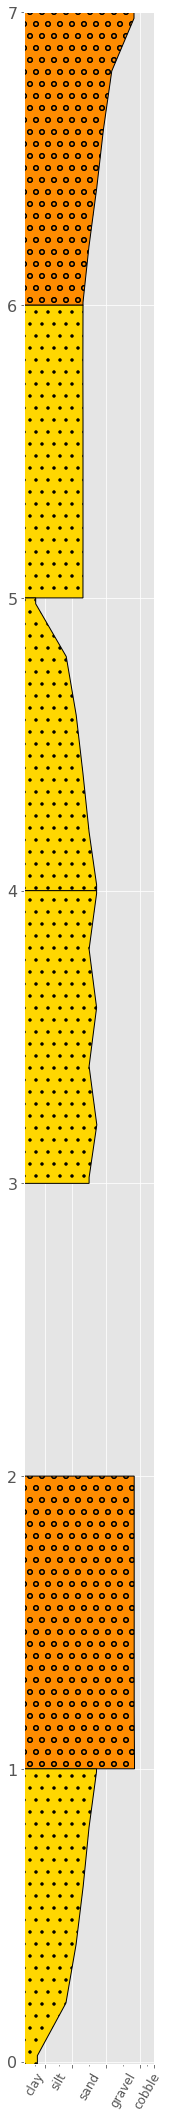

In [11]:
bed_seq.plot(legend=graphiclog.defaults.litholegend, fig_width=3,
             width_field='grain_size_psi', 
             depth_field='grain_size_thick',
             wentworth='coarse')